In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
Data = pd.read_excel(r'/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

In [ ]:
display(pd.DataFrame(Data))

,Acceleration,Agility,Stamina,Strength
0,30,36,34,31
1,32,36,42,31
2,37,44,48,32
3,38,46,49,33
4,38,46,50,33
...,...,...,...,...
1995,95,94,95,92
1996,95,94,95,92
1997,95,94,96,92
1998,96,95,96,94


In [ ]:
# Pilih kolom yang ingin dinormalisasi
columns_to_normalize = ['Acceleration', 'Agility', 'Stamina', 'Strength']

# Set nilai minimum dan maksimum sesuai dengan kebutuhan
max_values = {
    'Acceleration': (97),
    'Agility': (96),
    'Stamina': (97),
    'Strength': (94)
}

# Min-Max Scaling
for column in columns_to_normalize:
    max_val = max_values[column]
    Data[column] = (Data[column]) / (max_val)

# Tampilkan data yang sudah dinormalisasi
print("\nData yang Sudah Dinormalisasi:")
print(Data)


Data yang Sudah Dinormalisasi:
      Acceleration   Agility   Stamina  Strength
0         0.309278  0.375000  0.350515  0.329787
1         0.329897  0.375000  0.432990  0.329787
2         0.381443  0.458333  0.494845  0.340426
3         0.391753  0.479167  0.505155  0.351064
4         0.391753  0.479167  0.515464  0.351064
...            ...       ...       ...       ...
1995      0.979381  0.979167  0.979381  0.978723
1996      0.979381  0.979167  0.979381  0.978723
1997      0.979381  0.979167  0.989691  0.978723
1998      0.989691  0.989583  0.989691  1.000000
1999      1.000000  1.000000  1.000000  1.000000

[2000 rows x 4 columns]


Acceleration

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

Data = pd.read_excel(r'/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Acceleration'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Acceleration'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Acceleration"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Acceleration'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Acceleration', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))



Tabel Distribusi Frekuensi (dalam persen):
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Acceleration | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |            0.0 - 0.2             |     0     |                0                |              2000              |        0.0         |                   0.0                   |                 100.0                  |
| 1 |            0.2 - 0.4             |     5     |        


Tabel Distribusi Frekuensi (dalam persen):
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Acceleration | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |            0.0 - 0.2             |     0     |                0                |              2000              |        0.0         |                   0.0                   |                 100.0                  |
| 1 |            0.2 - 0.4             |     5     |        

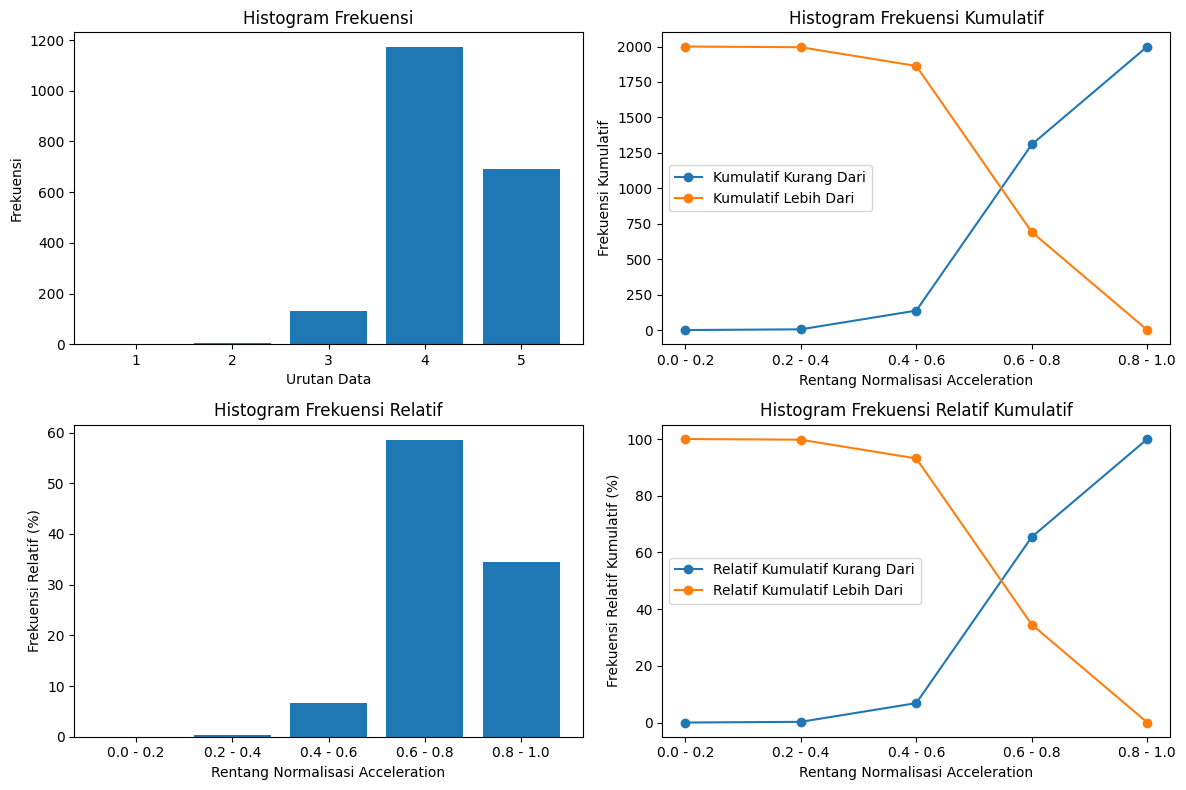

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Acceleration'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Acceleration'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Acceleration"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Acceleration'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Acceleration', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Acceleration'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Acceleration'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Acceleration')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang Normalisasi_Acceleration'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang Normalisasi Acceleration')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Acceleration'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Acceleration'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Acceleration')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()

Agility

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
Data = pd.read_excel(r'/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Agility'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Agility'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Agility"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Agility'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Agility', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))


Tabel Distribusi Frekuensi (dalam persen):
+---+-----------------------------+-----------+---------------------------------+--------------------------------+-------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Agility | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+-----------------------------+-----------+---------------------------------+--------------------------------+-------------------+-----------------------------------------+----------------------------------------+
| 0 |          0.0 - 0.2          |     0     |                0                |              2000              |        0.0        |                   0.0                   |                 100.0                  |
| 1 |          0.2 - 0.4          |     2     |                2                |   


Tabel Distribusi Frekuensi (dalam persen):
+---+-----------------------------+-----------+---------------------------------+--------------------------------+-------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Agility | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+-----------------------------+-----------+---------------------------------+--------------------------------+-------------------+-----------------------------------------+----------------------------------------+
| 0 |          0.0 - 0.2          |     0     |                0                |              2000              |        0.0        |                   0.0                   |                 100.0                  |
| 1 |          0.2 - 0.4          |     2     |                2                |   

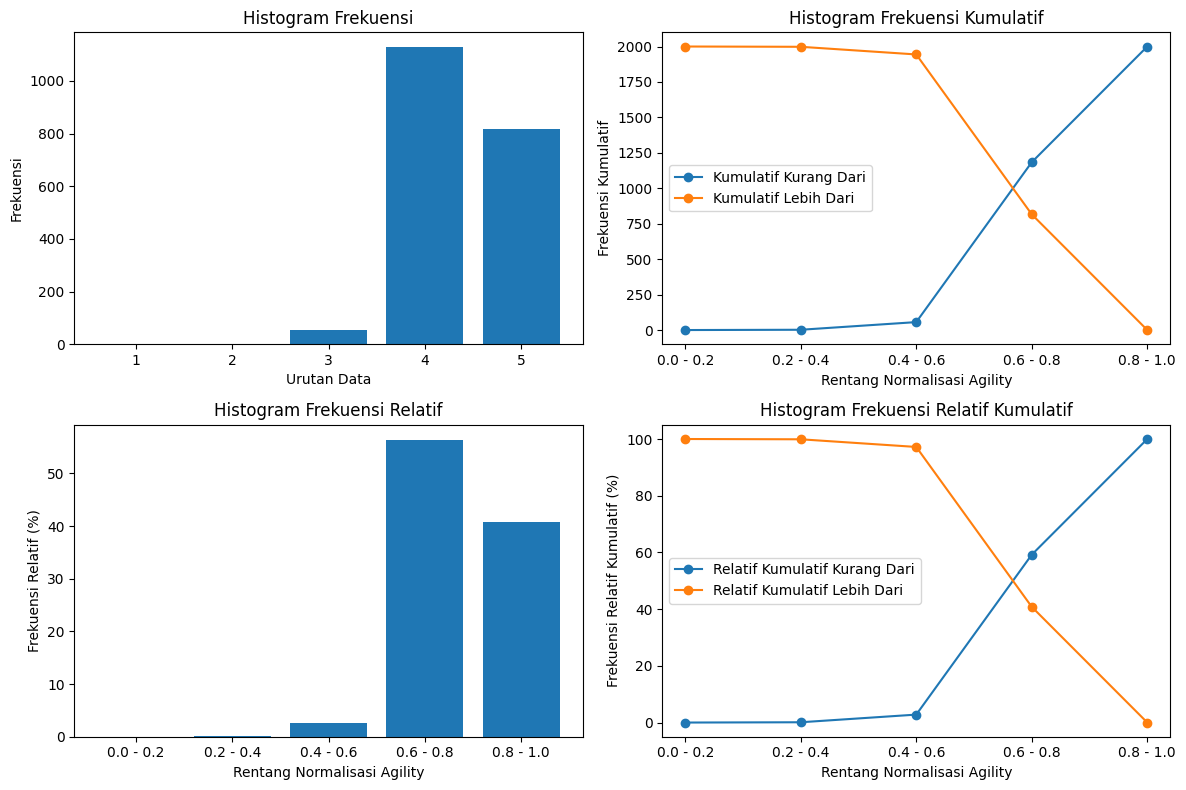

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Agility'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Agility'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Agility"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Agility'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Agility', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Agility'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Agility'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Agility')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang Normalisasi_Agility'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang Normalisasi Agility')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Agility'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Agility'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Agility')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()

Stamina

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
Data = pd.read_excel(r'/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Stamina'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Stamina'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Stamina"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Stamina'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Stamina', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))


Tabel Distribusi Frekuensi (dalam persen):
+---+-----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Stamina | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+-----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |          0.0 - 0.2          |     0     |                0                |              2000              |        0.0         |                   0.0                   |                 100.0                  |
| 1 |          0.2 - 0.4          |     1     |                1                


Tabel Distribusi Frekuensi (dalam persen):
+---+-----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Stamina | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+-----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |          0.0 - 0.2          |     0     |                0                |              2000              |        0.0         |                   0.0                   |                 100.0                  |
| 1 |          0.2 - 0.4          |     1     |                1                

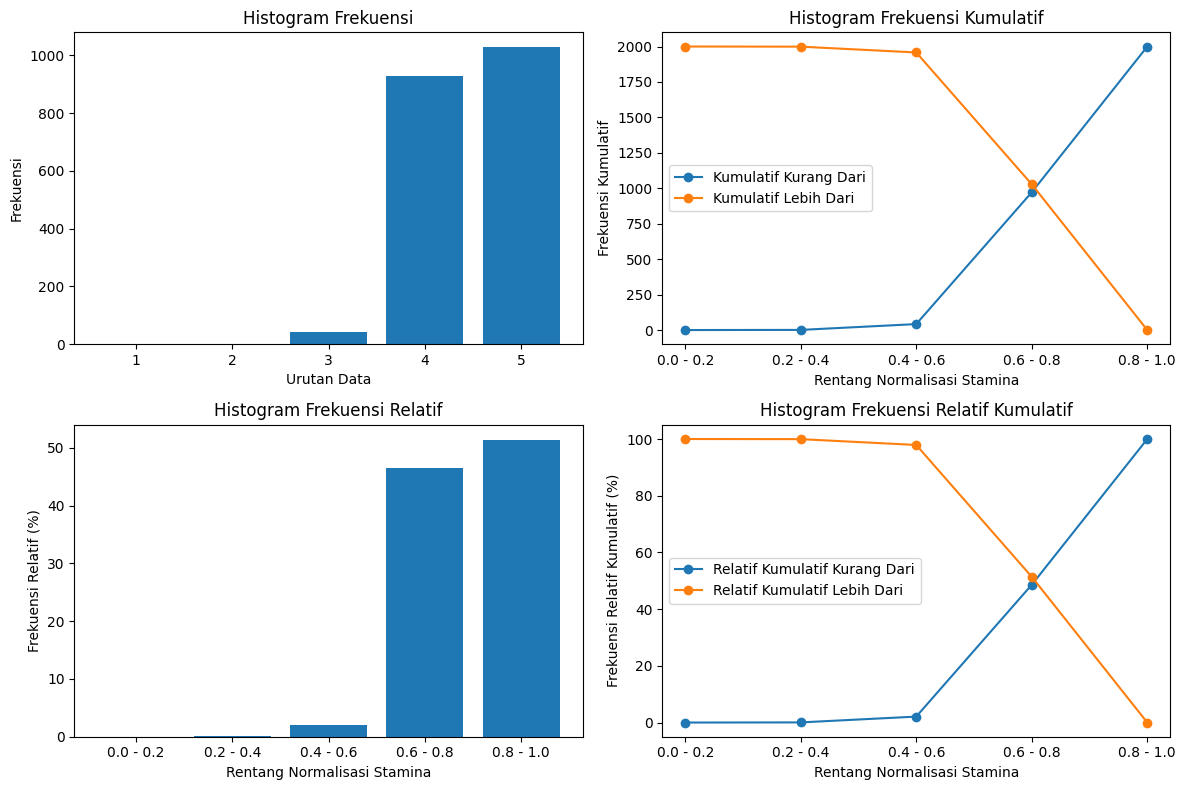

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Stamina'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Stamina'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Stamina"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Stamina'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Stamina', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Stamina'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Stamina'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Stamina')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang Normalisasi_Stamina'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang Normalisasi Stamina')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Stamina'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Stamina'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Stamina')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()

Strength

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
Data = pd.read_excel(r'/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Strength'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Strength'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Strength"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Strength'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Strength', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))


Tabel Distribusi Frekuensi (dalam persen):
+---+------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Strength | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |          0.0 - 0.2           |     0     |                0                |              2000              |        0.0         |                   0.0                   |                 100.0                  |
| 1 |          0.2 - 0.4           |    18     |               18           


Tabel Distribusi Frekuensi (dalam persen):
+---+------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Normalisasi_Strength | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |          0.0 - 0.2           |     0     |                0                |              2000              |        0.0         |                   0.0                   |                 100.0                  |
| 1 |          0.2 - 0.4           |    18     |               18           

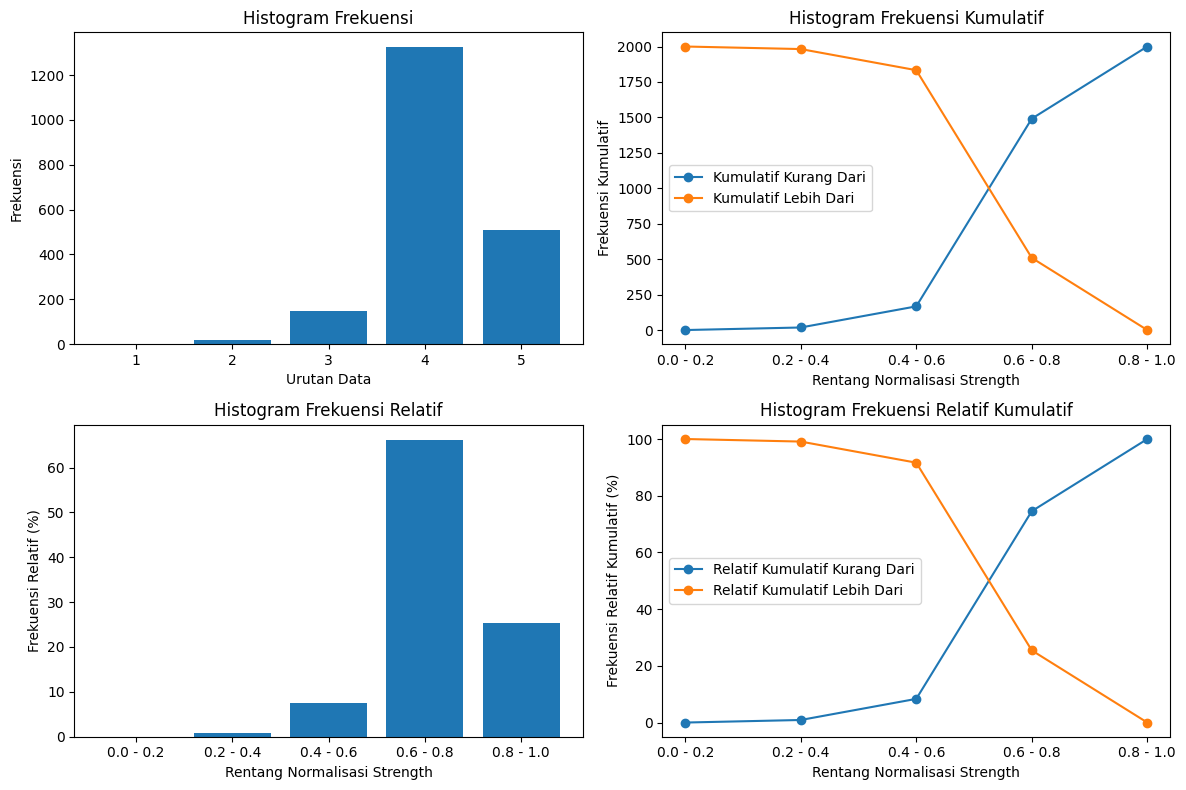

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel('/content/gdrive/My Drive/UTS STATKOM/sortfilter.xlsx')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Strength'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
Data['Normalisasi_Strength'] = Data[nama_kolom] / nilai_maksimum

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Strength"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Normalisasi_Strength'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Normalisasi_Strength', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()

# Hitung Frekuensi Kumulatif Lebih Dari dengan benar
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = len(Data) - frekuensi_tabel['Frekuensi Kumulatif Kurang Dari']

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Strength'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Strength'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Strength')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang Normalisasi_Strength'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang Normalisasi Strength')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang Normalisasi_Strength'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Normalisasi_Strength'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Normalisasi Strength')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()